# Overview of Chapter 3
How to perform customer segmentation using k-means clustering and analyze the segments. Segmentation allows you to send mroe targeted messaging through marketing campaigns, make better product recommendations, and more to make your overall customer experience better. 

A general customer segmentation exercise involves the following key steps: 
1. Choosing the relevant attributes for the entities 
2. Standardization 
3. Clustering / groupings the entities 
4. Understanding and describing the segments 

## Basic Segmentation 

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

data0 = pd.read_csv(r'G:\My Drive\Projects\Marketing Data Science\Mall_Customers_ch3.csv')
data0.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
data0.rename({'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spend_score'}, axis = 1, inplace=True)
data0

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data0.describe()

,CustomerID,Age,Income,Spend_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


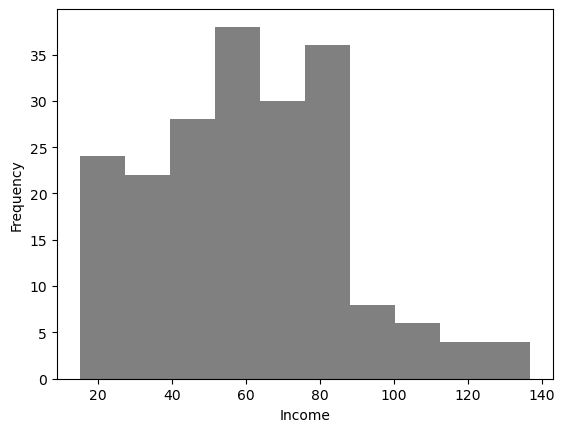

In [5]:
data0.Income.plot.hist(color='gray')
plt.xlabel('Income')
plt.show()

#### Group customers into 3 buckets based on Low, Moderate and High Income using `np.where`

Create a new column ‘Cluster’ to have the values ‘Low Income’, ‘Moderate Income’, ‘High earners’ for customers with income in the ranges < 50, 50 – 90, and >= 90 respectively, using the code below.



In [6]:
data0['Cluster'] = np.where(data0.Income >= 90, 'High earners', \
                            np.where(data0.Income < 50, \
                            'Low Income', 'Moderate Income'))  #last part is ELSE 
data0

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,19,15,39,Low Income
1,2,Male,21,15,81,Low Income
2,3,Female,20,16,6,Low Income
3,4,Female,23,16,77,Low Income
4,5,Female,31,17,40,Low Income
...,...,...,...,...,...,...
195,196,Female,35,120,79,High earners
196,197,Female,45,126,28,High earners
197,198,Male,32,126,74,High earners
198,199,Male,32,137,18,High earners


In [7]:
data0.groupby('Cluster')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
High earners,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
Low Income,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
Moderate Income,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


## Exercise 3.03: Standardizing Customer Data

Clustering if a type of unsupervised ML technique that looks for groups or clusters in data without knowing them ahead of time. 

Considerations with clustering 
- customer groups created may not be easily interpretable 
- if data is not based on customer behavior (such as products or services purchased) it may not be clear how to use the clusters that are found 

making sure to use relevant attributes - some examples could be customer engagement, time spent on site, visits during a defined period of time, days since last login, etc. 

standardization is needed first before we cluster bc our numeric data is on different scales - income vs. age for example. the standard deviation would range quite differently for each. we want our values to be on a similar compariable scale. This ensures that all columns get equal weightage when calculating the similarity or distance between each customer in the cluster.

a popular way to standardize data is with `z-score`using the `StandardScaler` in `sklearn`

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # our scaler object has methods to fit a given dataset (calculating std and mean for each column)

In [9]:
data_scaled = data0.copy() 

In [10]:
#fit_transform (fit calculates the mean and std; transform applies the actual transformation)
data_scaled[['Age', 'Income', 'Spend_score']] = scaler.fit_transform(data0[['Age', 'Income', 'Spend_score']])

Can also use a list of the columns you want to scale 

`cols_to_scale = ['Age', 'Income', 'Spend_score']`

`data_scaled[cols_to_scale] = scaler.fit_transform(data0[cols_to_scale])`

In [11]:
# mean for all cols is basically 0 and std is 1 
data_scaled.describe()

,CustomerID,Age,Income,Spend_score
count,200.000000,2.000000e+02,2.000000e+02,2.000000e+02
mean,100.500000,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,57.879185,1.002509e+00,1.002509e+00,1.002509e+00
min,1.000000,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,50.750000,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,100.500000,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,150.250000,7.284319e-01,6.656748e-01,8.851316e-01
max,200.000000,2.235532e+00,2.917671e+00,1.894492e+00


In [12]:
data_scaled

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,Low Income
1,2,Male,-1.281035,-1.738999,1.195704,Low Income
2,3,Female,-1.352802,-1.700830,-1.715913,Low Income
3,4,Female,-1.137502,-1.700830,1.040418,Low Income
4,5,Female,-0.563369,-1.662660,-0.395980,Low Income
...,...,...,...,...,...,...
195,196,Female,-0.276302,2.268791,1.118061,High earners
196,197,Female,0.441365,2.497807,-0.861839,High earners
197,198,Male,-0.491602,2.497807,0.923953,High earners
198,199,Male,-0.491602,2.917671,-1.250054,High earners


### Calculating the Similarity of Customers using Euclidean Distance with `cdist` in `SciPy` using Income and Spend Score

`cdist` is used to calculate the distance between each pair of the two collecctions of inputs 

In [13]:
sel_cols = ['Income', 'Spend_score'] # getting the distance between these two columns 
cust3 = data_scaled[sel_cols].head(3)
cust3 #top 3 records 

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


In [14]:
from scipy.spatial.distance import cdist

In [15]:
cdist(cust3, cust3, metric='euclidean') 
# this 2D grid output shows the distance between the 1st and 2nd customer is 1.63050555
# the distance between the 2nd and 3rd customer is 2.91186723

#values with lower distances are more similar, values with higher distances are less similar 

array([[0.        , 1.63050555, 1.28167999],
       [1.63050555, 0.        , 2.91186723],
       [1.28167999, 2.91186723, 0.        ]])

## K-Means Clustering 

k-means clustering is an algorithm that tries to find the best way of grouping data points into k different groups, where k is a parameter given to the algorithm. 

the algorithm work iteratively to try and find the best grouping by updating the centroid (middle) of the clusters

`from sklearn.cluster import KMeans`

`model = KMeans(n_clusters=N, random_state=random_state)`

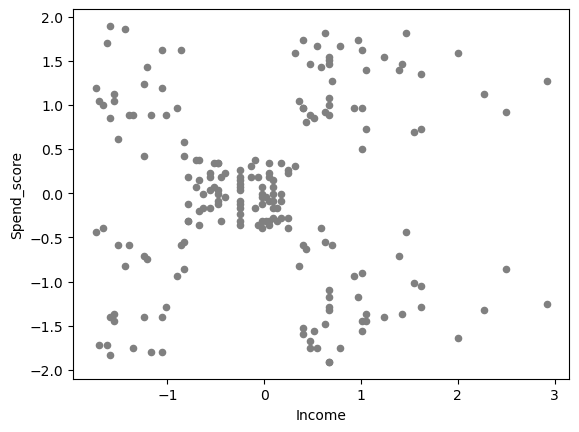

In [16]:
# Get an inital feel for our data via a scatterplot and how many clusters we'll need
data_scaled.plot.scatter(x='Income', y='Spend_score', color='gray')
plt.show()

In [17]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=42)

In [18]:
cluster_cols = ['Income', 'Spend_score']

In [19]:
#fit the model using the cluster columns 
model.fit(data_scaled[cluster_cols]) 

# predict the clusters using the 2 cols from the scaled data and add clusters into a new column called Cluster 
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols]) 

C:\Users\emily.clark\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\emily.clark\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
data_scaled.head(5)

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,2
1,2,Male,-1.281035,-1.738999,1.195704,3
2,3,Female,-1.352802,-1.700830,-1.715913,2
3,4,Female,-1.137502,-1.700830,1.040418,3
4,5,Female,-0.563369,-1.662660,-0.395980,2


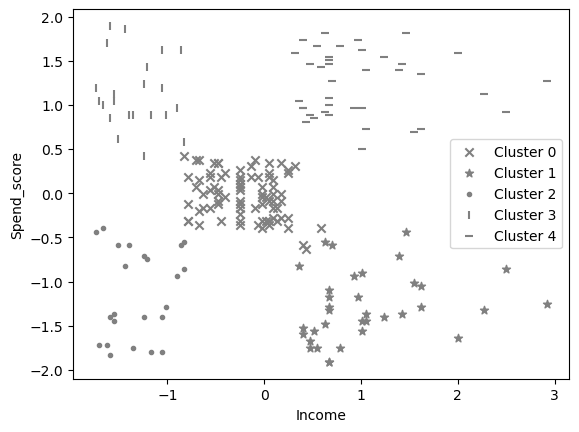

In [21]:
markers = ['x', '*', '.','|','_']

for clust in range(5):
    temp = data_scaled[data_scaled.Cluster == clust] 
    plt.scatter(temp.Income, temp.Spend_score, \
                marker=markers[clust], \
                color = 'gray',\
                label="Cluster "+str(clust))
plt.xlabel('Income')
plt.ylabel('Spend_score')
plt.legend()
plt.show()

### Understanding the clusters 

In [22]:
data0['Cluster'] = data_scaled.Cluster # add our new clusters to the OG data 
data0

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


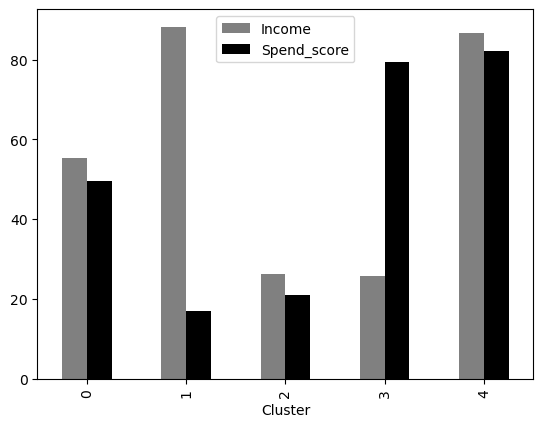

In [23]:
data0.groupby('Cluster')[['Income', 'Spend_score']].mean().plot.bar(color=['gray', 'black'])
plt.show()

Can add catchy names to each of your cluster groups to help convey what that segment represents
- Cluster 0: Moderate-income, Moderate spenders 
- Cluster 1: High-income, low spenders 
- Cluster 2: Low-income, low spender 
- Cluster 3: Low-income, high spenders
- Cluster 4: High-income, high spender

##  Clustering High Dimensional Data with PCA

PCA (Principal Component Analysis) is a common technique for finding patterns in data of high dimension (dimensionality reduction). Is a way to perform dimensionality reduction by taking the origional features and dimensions and creates new features/dimensions that capture the most variance in the data. The PC (principal components) you are left with most of the information about the data. 

Since in this case, we are using 3 features to create our segments, visualization will not be easy. Therefore, we will use PCA to reduce the data to two dimensions to visualize the clusters. 

#### Steps 
1. Normalization of cols 
2. K-Means clustering with 3 features 
3. Create 2 PCs 
4. Graph the PCs on a scatterplot

In [31]:
cluster_cols = ['Age', 'Income', 'Spend_score']
data_scaled[cluster_cols].head(5)

,Age,Income,Spend_score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [32]:
# perform K-Means clustering specifying 4 clusters using the scaled features 
model = KMeans(n_clusters=4, random_state=42) # 4 clusters 
model.fit(data_scaled[cluster_cols])  # using 3 scaled cols to create clusters 

#assign the clusters to the Cluster column 
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols]) # predict clusters based on the 3 columns 

C:\Users\emily.clark\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\emily.clark\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Using PCA on the scaled columns, create two new columns pc1 and pc2 containing data for PC1 and PC2 respectively 

In [33]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(data_scaled[cluster_cols])

data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

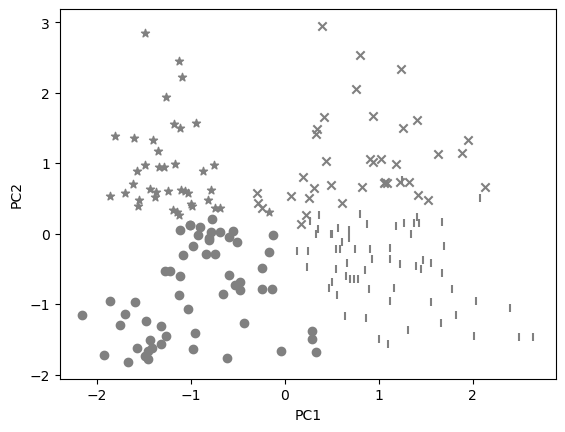

In [34]:
# visualize the clusters by using different markers on a scatterplot between pc1 and pc2 
markers = ['x', '*', 'o','|']

for clust in range(4):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], \
                label="Cluster "+str(clust), \
                color='gray')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [35]:
data0['Cluster'] = data_scaled.Cluster

In [36]:
data0

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


In [37]:
# to understand the clusters, print the averages of the OG features that we used to calulate the clusters 
data0.groupby('Cluster')[['Age', 'Income', 'Spend_score']].mean()

# we can see that the spend score varies significantly - and so do age and income 

,Age,Income,Spend_score
Cluster,,,
0,39.368421,86.500000,19.578947
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,53.984615,47.707692,39.969231


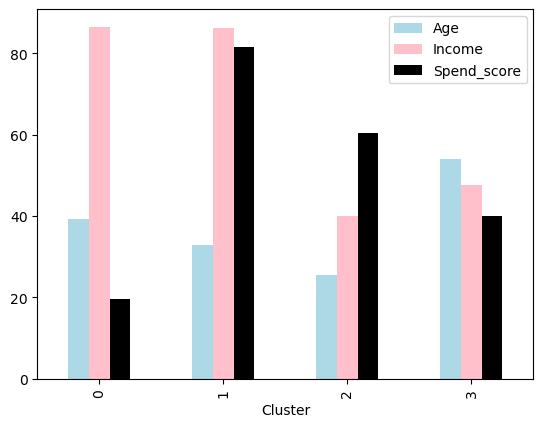

In [44]:
data0.groupby('Cluster')[['Age', 'Income', 'Spend_score']].mean().plot.bar(color=['lightblue', 'pink', 'black'])
plt.show()

#### Describing our clusters 
- Cluster 0: Middle aged penny pinchers (high income, low spend)
- Cluster 1: Young high rollers (younger age, high income, high spend) 
- Cluster 2: Young aspireers (low income, high spend)  
- Cluster 3: Old Average Joes (average income, average spend) 
